<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E5%AE%9E%E4%BE%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV,RidgeCV,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# from sklearn.linear_model.coordinate_descent import ConvergenceWarning


In [4]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [5]:
## 创建模拟数据
np.random.seed(100)
np.set_printoptions(linewidth=1000,suppress=True) #显示方式设置，每行的字符数用于插入换行符，是否使用科学计数法
N=10
x= np.linspace(0,6,N) + np.random.randn(N)
y= 1.8*x**3 + x**2 - 14*x -7 +np.random.randn(N)
## 将其设置为矩阵
x.shape = -1,1
y.shape = -1,1


In [6]:
## RidgeCV和Ridge的区别是：前者可以进行交叉验证
models = [
          Pipeline([
                    ('Poly',PolynomialFeatures(include_bias=False)),
                    ('Linear',LinearRegression(fit_intercept=False))
          ]),
          Pipeline([
                    ('Poly',PolynomialFeatures(include_bias=False)),
                    # alpha给定的是Ridge算法中，L2正则项的权重值，也就是兰姆达
                    # alphas是给定CV交叉验证过程中，Ridge算法的alpha参数值的取值的范围
                    ('Linear',RidgeCV(alphas=np.logspace(-3,2,50),fit_intercept=False))
          ]),
          Pipeline([
                    ('Poly',PolynomialFeatures(include_bias=False)),
                    ('Linear',LassoCV(alphas=np.logspace(0,1,10), fit_intercept=False))
          ]),
          Pipeline([
                    ('Poly',PolynomialFeatures(include_bias=False)),
                    # la_ratio：给定EN算法中L1正则项在整个惩罚项中的比例，这里给定的是一个列表；
                    # 表示的是在CV交叉验证的过程中，EN算法L1正则项的权重比例的可选值的范围
                    ('Linear',ElasticNetCV(alphas=np.logspace(0,1,10), l1_ratio=[.1, .5, .7, .9, .95, 1], fit_intercept=False))
          ])

]

1 rank，Scalar： [30.38156963]
5 rank，Scalar： [-19.20808111  -0.21353395   3.43106275  -0.38668311   0.02765531]
9 rank，Scalar： [-109.41783024  187.72709313 -113.70069374   -4.58285732   36.05537056  -17.39656034    3.8283995    -0.41298249    0.01765462]


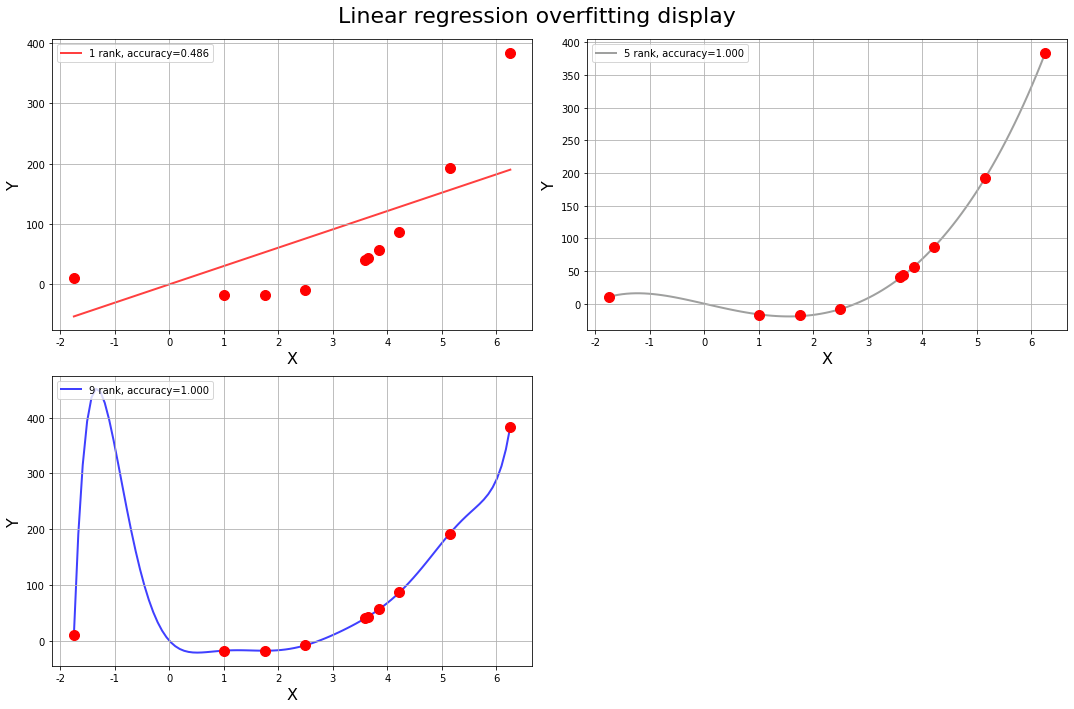

In [10]:
## 线性模型过拟合图形识别
plt.figure(facecolor='w',figsize=(15,10))
degree = np.arange(1,N,4) #阶
dm = degree.size

colors = [] #颜色
for c in np.linspace(16711680, 255, dm):
  colors.append('#%06x' % int(c))

model = models[0]

for i,d in enumerate(degree):
  plt.subplot(int(np.ceil(dm/2.0)),2,i+1)
  plt.plot(x,y,'ro',ms=10,zorder=N)
  # 设置阶数
  model.set_params(Poly__degree=d)
  # 模型训练
  model.fit(x, y.ravel())
  lin = model.get_params('Linear')['Linear']
  output = u'%d rank，Scalar：' % (d)
  # 判断lin对象中是否有对应的属性
  if hasattr(lin, 'alpha_'):
      idx = output.find(u'Scalar')
      output = output[:idx] + (u'alpha=%.6f, ' % lin.alpha_) + output[idx:]
  if hasattr(lin, 'l1_ratio_'):
      idx = output.find(u'Scalar')
      output = output[:idx] + (u'l1_ratio=%.6f, ' % lin.l1_ratio_) + output[idx:]
  print (output, lin.coef_.ravel())

  x_hat = np.linspace(x.min(), x.max(), num=100) ## 产生模拟数据
  x_hat.shape = -1,1
  y_hat = model.predict(x_hat)
  s = model.score(x, y)

  z = N - 1 if (d == 2) else 0
  label = u'%d rank, accuracy=%.3f' % (d,s)
  plt.plot(x_hat, y_hat, color=colors[i], lw=2, alpha=0.75, label=label, zorder=z)
    
  plt.legend(loc = 'upper left')
  plt.grid(True)
  plt.xlabel('X', fontsize=16)
  plt.ylabel('Y', fontsize=16)


plt.tight_layout(1, rect=(0,0,1,0.95))
plt.suptitle(u'Linear regression overfitting display', fontsize=22)
plt.show()



Linear regression:1 rank，Scalar： [30.38156963]
Linear regression:3 rank，Scalar： [-13.79947972  -0.22559096   1.96459255]
Linear regression:5 rank，Scalar： [-19.20808111  -0.21353395   3.43106275  -0.38668311   0.02765531]
Linear regression:7 rank，Scalar： [-22.90452624   2.55148389   3.97385058  -1.21202144   0.24964178  -0.02260922   0.0007314 ]
Linear regression:9 rank，Scalar： [-109.41783024  187.72709313 -113.70069374   -4.58285732   36.05537056  -17.39656034    3.8283995    -0.41298249    0.01765462]
Ridge:1 rank，alpha=2.329952, Scalar： [29.87629065]
Ridge:3 rank，alpha=0.719686, Scalar： [-12.98191422  -0.50844765   1.98772916]
Ridge:5 rank，alpha=0.026827, Scalar： [-18.76655299  -0.28947771   3.32509764  -0.35027494   0.02456039]
Ridge:7 rank，alpha=0.016768, Scalar： [-17.34640888  -3.48657706   4.33150776   0.39729205  -0.45104326   0.08994479  -0.00562373]
Ridge:9 rank，alpha=5.963623, Scalar： [-2.2521578  -2.27937783 -1.70299005 -1.0348803   0.85755012  0.37020601 -0.26024291  0.0470

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329.82820960894253, tolerance: 19.88453991475296
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244.59374000660887, tolerance: 19.88453991475296
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202.1207897970677, tolerance: 19.88453991475296
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to incr

Lasso:9 rank，alpha=10.000000, Scalar： [-0.         -0.         -0.64388489  0.37282264  0.01545951  0.00027025 -0.0001603  -0.000029   -0.00000447]
ElasticNet:1 rank，alpha=3.593814, l1_ratio=0.100000, Scalar： [24.5837763]
ElasticNet:3 rank，alpha=1.668101, l1_ratio=1.000000, Scalar： [-12.9336067   -0.38178368   1.96293775]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394.0987435446282, tolerance: 19.88453991475296
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.0624179077948, tolerance: 19.88453991475296
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277.81433618887564, tolerance: 19.88453991475296
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to incre

ElasticNet:5 rank，alpha=2.154435, l1_ratio=0.900000, Scalar： [-8.69348662 -0.92622031  1.36771803  0.15623518 -0.01026305]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 536.496179931305, tolerance: 19.422206851837533
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460.0364657684512, tolerance: 19.422206851837533
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297.6475431798235, tolerance: 19.422206851837533
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to incr

ElasticNet:7 rank，alpha=10.000000, l1_ratio=0.700000, Scalar： [-0.26260411 -0.58289981 -0.48559733  0.42950016  0.00843917 -0.00100712 -0.0004015 ]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194.13867881643904, tolerance: 19.887595002403238
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.631993242941, tolerance: 19.887595002403238
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.00077187952132, tolerance: 19.887595002403238
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.7095

ElasticNet:9 rank，alpha=10.000000, l1_ratio=0.100000, Scalar： [-0.59980891 -0.53028001 -0.49033227  0.40675528  0.00848508  0.00000901 -0.00016187 -0.00002562 -0.00000379]


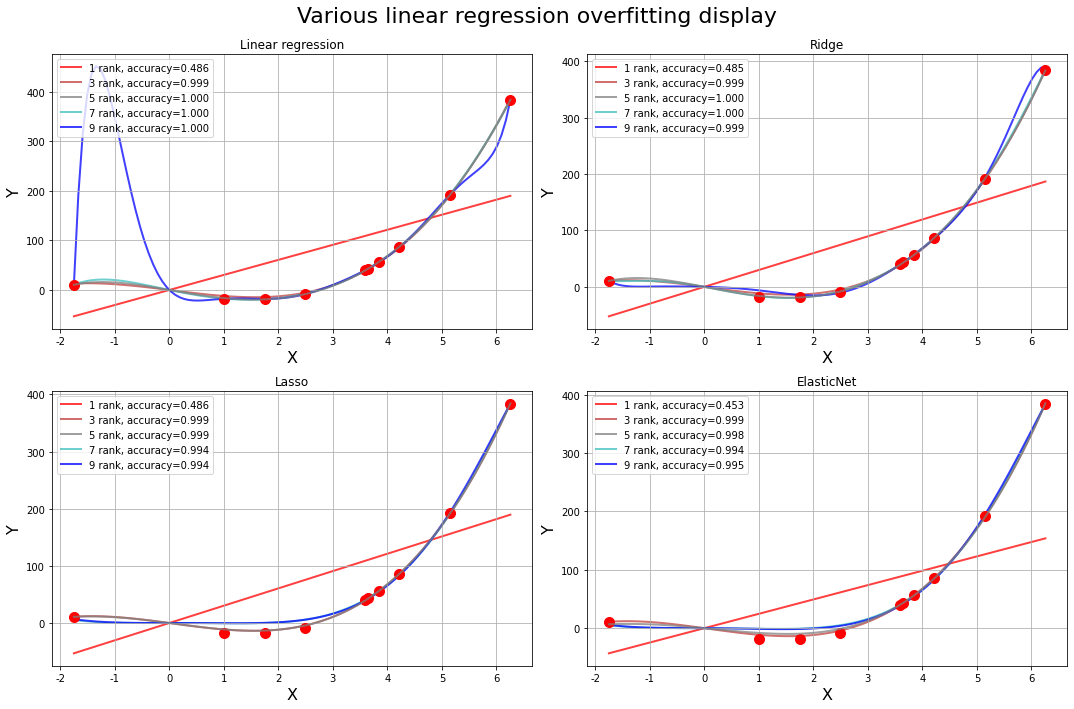

In [11]:
## 线性回归、Lasso回归、Ridge回归、ElasticNet比较
plt.figure(facecolor='w',figsize=(15,10))
degree = np.arange(1,N, 2) # 阶， 多项式扩展允许给定的阶数
dm = degree.size
colors = [] # 颜色
for c in np.linspace(16711680, 255, dm):
    colors.append('#%06x' % int(c))
titles = [u'Linear regression', u'Ridge', u'Lasso', u'ElasticNet']

for t in range(4):
    model = models[t]#选择了模型--具体的pipeline(线性、Lasso、Ridge、EN)
    plt.subplot(2,2,t+1) # 选择具体的子图
    plt.plot(x, y, 'ro', ms=10, zorder=N) # 在子图中画原始数据点； zorder：图像显示在第几层

    # 遍历不同的多项式的阶，看不同阶的情况下，模型的效果
    for i,d in enumerate(degree):
        # 设置阶数(多项式)
        model.set_params(Poly__degree=d)
        # 模型训练
        model.fit(x, y.ravel())

        # 获取得到具体的算法模型
        # model.get_params()方法返回的其实是一个dict对象，后面的Linear其实是dict对应的key
        # 也是我们在定义Pipeline的时候给定的一个名称值
        lin = model.get_params()['Linear']
        # 打印数据
        output = u'%s:%d rank，Scalar：' % (titles[t],d)
        # 判断lin对象中是否有对应的属性
        if hasattr(lin, 'alpha_'): # 判断lin这个模型中是否有alpha_这个属性
            idx = output.find(u'Scalar')
            output = output[:idx] + (u'alpha=%.6f, ' % lin.alpha_) + output[idx:]
        if hasattr(lin, 'l1_ratio_'): # 判断lin这个模型中是否有l1_ratio_这个属性
            idx = output.find(u'Scalar')
            output = output[:idx] + (u'l1_ratio=%.6f, ' % lin.l1_ratio_) + output[idx:]
        # line.coef_：获取线性模型的参数列表，也就是我们ppt中的theta值，ravel()将结果转换为1维数据
        print (output, lin.coef_.ravel())

        # 产生模拟数据
        x_hat = np.linspace(x.min(), x.max(), num=100) ## 产生模拟数据
        x_hat.shape = -1,1
        # 数据预测
        y_hat = model.predict(x_hat)
        # 计算准确率
        s = model.score(x, y)

        # 当d等于5的时候，设置为N-1层，其它设置0层；将d=5的这条线凸显出来
        z = N + 1 if (d == 5) else 0
        label = u'%d rank, accuracy=%.3f' % (d,s)
        plt.plot(x_hat, y_hat, color=colors[i], lw=2, alpha=0.75, label=label, zorder=z)
    
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.title(titles[t])
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
plt.tight_layout(1, rect=(0,0,1,0.95))
plt.suptitle(u'Various linear regression overfitting display', fontsize=22)
plt.show()